----
# EXERCISE 1:  MESH WORLD
----

### 1.1 MDP Modeling

In [3]:
import numpy as np
import matplotlib.pyplot as plt

##### 1.1.1 State / Action Space

Mesh 10 x 10: 100 different states.
- State k ; 0 <= k <= 99

Position (i,j): (0,0) up left corner / (9,9) down right corner.
- (i,j) ; i: row, j: column
    - 0 <= i <= 9
    - 0 <= j <= 9
- k = i*10 + j (state index)

Actions state definition:
- Action a ; 0 <= a <= 3
    - 0: arriba
    - 1: abajo
    - 2: izquierda
    - 3: derecha

In [35]:
def pos2state(i,j):
    return i*10 + j

def state2pos(k):
    return k//10, k%10

a_dict = {0: 'arriba', 1: 'abajo', 2: 'izquierda', 3: 'derecha'}

##### 1.1.2 Reward function

In [36]:
#############
R = np.zeros((100,4,100)) # R[s,a,s']

R[pos2state(2,7),:,:] = 3
R[pos2state(4,3),:,:] = -5
R[pos2state(7,3),:,:] = -10
R[pos2state(7,8),:,:] = 10

for i in range(10):
    R[pos2state(0,i),:,pos2state(0,i)] = -1   
    R[pos2state(9,i),:,pos2state(9,i)] = -1
    R[pos2state(i,0),:,pos2state(i,0)] = -1
    R[pos2state(i,9),:,pos2state(i,9)] = -1

##### 1.1.3 Transition Function - Full tabulation

In [37]:
# Función de transición	
T = np.zeros((100,4,100)) # T[s,a,s']

#####################################
##### Caso 1: movimiento normal #####
#####################################

for i in range(1,9):
    for j in range(1,9):
        
        # Acción: arriba
        T[pos2state(i,j),0,pos2state(i-1,j)] = 0.7 # Arriba
        T[pos2state(i,j),0,pos2state(i+1,j)] = 0.1 # Abajo
        T[pos2state(i,j),0,pos2state(i,j-1)] = 0.1 # Izquierda
        T[pos2state(i,j),0,pos2state(i,j+1)] = 0.1 # Derecha
        # Acción: abajo 
        T[pos2state(i,j),1,pos2state(i-1,j)] = 0.1 # Arriba
        T[pos2state(i,j),1,pos2state(i+1,j)] = 0.7 # Abajo
        T[pos2state(i,j),1,pos2state(i,j-1)] = 0.1 # Izquierda
        T[pos2state(i,j),1,pos2state(i,j+1)] = 0.1 # Derecha
        # Acción: izquierda
        T[pos2state(i,j),2,pos2state(i-1,j)] = 0.1 # Arriba
        T[pos2state(i,j),2,pos2state(i+1,j)] = 0.1 # Abajo
        T[pos2state(i,j),2,pos2state(i,j-1)] = 0.7 # Izquierda
        T[pos2state(i,j),2,pos2state(i,j+1)] = 0.1 # Derecha
        # Acción: derecha
        T[pos2state(i,j),3,pos2state(i-1,j)] = 0.1 # Arriba
        T[pos2state(i,j),3,pos2state(i+1,j)] = 0.1 # Abajo
        T[pos2state(i,j),3,pos2state(i,j-1)] = 0.1 # Izquierda
        T[pos2state(i,j),3,pos2state(i,j+1)] = 0.7 # Derecha

#############################################
##### Caso 2: movimiento en los límites #####
#############################################

# FILAS LÍMITES (excepto esquinas)  
for j in range(1,9):

    # SUPERIOR
    # Acción: arriba
    T[pos2state(0,j),0,pos2state(0,j)] = 0.7 # Arriba -> Mismo sitio
    T[pos2state(0,j),0,pos2state(1,j)] = 0.1 # Abajo
    T[pos2state(0,j),0,pos2state(0,j-1)] = 0.1 # Izquierda
    T[pos2state(0,j),0,pos2state(0,j+1)] = 0.1 # Derecha
    # Acción: abajo
    T[pos2state(0,j),1,pos2state(0,j)] = 0.1 # Arriba -> Mismo sitio
    T[pos2state(0,j),1,pos2state(1,j)] = 0.7 # Abajo
    T[pos2state(0,j),1,pos2state(0,j-1)] = 0.1 # Izquierda
    T[pos2state(0,j),1,pos2state(0,j+1)] = 0.1 # Derecha
    # Acción: izquierda
    T[pos2state(0,j),2,pos2state(0,j)] = 0.1 # Arriba -> Mismo sitio
    T[pos2state(0,j),2,pos2state(1,j)] = 0.1 # Abajo
    T[pos2state(0,j),2,pos2state(0,j-1)] = 0.7 # Izquierda
    T[pos2state(0,j),2,pos2state(0,j+1)] = 0.1 # Derecha
    # Acción: derecha
    T[pos2state(0,j),3,pos2state(0,j)] = 0.1 # Arriba -> Mismo sitio
    T[pos2state(0,j),3,pos2state(1,j)] = 0.1 # Abajo
    T[pos2state(0,j),3,pos2state(0,j-1)] = 0.1 # Izquierda
    T[pos2state(0,j),3,pos2state(0,j+1)] = 0.7 # Derecha

    # INFERIOR
    # Acción: arriba
    T[pos2state(9,j),0,pos2state(8,j)] = 0.7 # Arriba
    T[pos2state(9,j),0,pos2state(9,j)] = 0.1 # Abajo -> Mismo sitio
    T[pos2state(9,j),0,pos2state(9,j-1)] = 0.1 # Izquierda
    T[pos2state(9,j),0,pos2state(9,j+1)] = 0.1 # Derecha
    # Acción: abajo
    T[pos2state(9,j),1,pos2state(8,j)] = 0.1 # Arriba
    T[pos2state(9,j),1,pos2state(9,j)] = 0.7 # Abajo -> Mismo sitio
    T[pos2state(9,j),1,pos2state(9,j-1)] = 0.1 # Izquierda
    T[pos2state(9,j),1,pos2state(9,j+1)] = 0.1 # Derecha
    # Acción: izquierda
    T[pos2state(9,j),2,pos2state(8,j)] = 0.1 # Arriba
    T[pos2state(9,j),2,pos2state(9,j)] = 0.1 # Abajo -> Mismo sitio
    T[pos2state(9,j),2,pos2state(9,j-1)] = 0.7 # Izquierda
    T[pos2state(9,j),2,pos2state(9,j+1)] = 0.1 # Derecha
    # Acción: derecha
    T[pos2state(9,j),3,pos2state(8,j)] = 0.1 # Arriba
    T[pos2state(9,j),3,pos2state(9,j)] = 0.1 # Abajo -> Mismo sitio
    T[pos2state(9,j),3,pos2state(9,j-1)] = 0.1 # Izquierda
    T[pos2state(9,j),3,pos2state(9,j+1)] = 0.7 # Derecha

# COLUMNAS LÍMITES (excepto esquinas)  
for i in range(1,9):

    # IZQUIERDA
    # Acción: arriba
    T[pos2state(i,0),0,pos2state(i-1,0)] = 0.7 # Arriba
    T[pos2state(i,0),0,pos2state(i+1,0)] = 0.1 # Abajo
    T[pos2state(i,0),0,pos2state(i,0)] = 0.1 # Izquierda -> Mismo sitio
    T[pos2state(i,0),0,pos2state(i,1)] = 0.1 # Derecha
    # Acción: abajo
    T[pos2state(i,0),1,pos2state(i-1,0)] = 0.1 # Arriba
    T[pos2state(i,0),1,pos2state(i+1,0)] = 0.7 # Abajo
    T[pos2state(i,0),1,pos2state(i,0)] = 0.1 # Izquierda -> Mismo sitio
    T[pos2state(i,0),1,pos2state(i,1)] = 0.1 # Derecha
    # Acción: izquierda
    T[pos2state(i,0),2,pos2state(i-1,0)] = 0.1 # Arriba
    T[pos2state(i,0),2,pos2state(i+1,0)] = 0.1 # Abajo
    T[pos2state(i,0),2,pos2state(i,0)] = 0.7 # Izquierda -> Mismo sitio
    T[pos2state(i,0),2,pos2state(i,1)] = 0.1 # Derecha
    # Acción: derecha
    T[pos2state(i,0),3,pos2state(i-1,0)] = 0.1 # Arriba
    T[pos2state(i,0),3,pos2state(i+1,0)] = 0.1 # Abajo
    T[pos2state(i,0),3,pos2state(i,0)] = 0.1 # Izquierda -> Mismo sitio
    T[pos2state(i,0),3,pos2state(i,1)] = 0.7 # Derecha

    # DERECHA
    # Acción: arriba
    T[pos2state(i,9),0,pos2state(i-1,9)] = 0.7 # Arriba
    T[pos2state(i,9),0,pos2state(i+1,9)] = 0.1 # Abajo
    T[pos2state(i,9),0,pos2state(i,8)] = 0.1 # Izquierda
    T[pos2state(i,9),0,pos2state(i,9)] = 0.1 # Derecha -> Mismo sitio
    # Acción: abajo
    T[pos2state(i,9),1,pos2state(i-1,9)] = 0.1 # Arriba
    T[pos2state(i,9),1,pos2state(i+1,9)] = 0.7 # Abajo
    T[pos2state(i,9),1,pos2state(i,8)] = 0.1 # Izquierda
    T[pos2state(i,9),1,pos2state(i,9)] = 0.1 # Derecha -> Mismo sitio
    # Acción: izquierda
    T[pos2state(i,9),2,pos2state(i-1,9)] = 0.1 # Arriba
    T[pos2state(i,9),2,pos2state(i+1,9)] = 0.1 # Abajo
    T[pos2state(i,9),2,pos2state(i,8)] = 0.7 # Izquierda
    T[pos2state(i,9),2,pos2state(i,9)] = 0.1 # Derecha -> Mismo sitio
    # Acción: derecha
    T[pos2state(i,9),3,pos2state(i-1,9)] = 0.1 # Arriba
    T[pos2state(i,9),3,pos2state(i+1,9)] = 0.1 # Abajo
    T[pos2state(i,9),3,pos2state(i,8)] = 0.1 # Izquierda
    T[pos2state(i,9),3,pos2state(i,9)] = 0.7 # Derecha -> Mismo sitio

# ESQUINAS
# SUPERIOR IZQUIERDA
# Acción: arriba
T[pos2state(0,0),0,pos2state(0,0)] = 0.8 # Arriba/Izquierda -> Mismo sitio
T[pos2state(0,0),0,pos2state(0,1)] = 0.1 # Derecha
T[pos2state(0,0),0,pos2state(1,0)] = 0.1 # Abajo
# Acción: abajo
T[pos2state(0,0),1,pos2state(0,0)] = 0.2 # Arriba/Izquierda -> Mismo sitio
T[pos2state(0,0),1,pos2state(0,1)] = 0.1 # Derecha
T[pos2state(0,0),1,pos2state(1,0)] = 0.7 # Abajo
# Acción: izquierda
T[pos2state(0,0),2,pos2state(0,0)] = 0.8 # Arriba/Izquierda -> Mismo sitio
T[pos2state(0,0),2,pos2state(0,1)] = 0.1 # Derecha
T[pos2state(0,0),2,pos2state(1,0)] = 0.1 # Abajo
# Acción: derecha
T[pos2state(0,0),3,pos2state(0,0)] = 0.2 # Arriba/Izquierda -> Mismo sitio
T[pos2state(0,0),3,pos2state(0,1)] = 0.7 # Derecha
T[pos2state(0,0),3,pos2state(1,0)] = 0.1 # Abajo

# SUPERIOR DERECHA
# Acción: arriba
T[pos2state(0,9),0,pos2state(0,9)] = 0.8 # Arriba/Derecha -> Mismo sitio
T[pos2state(0,9),0,pos2state(0,8)] = 0.1 # Izquierda
T[pos2state(0,9),0,pos2state(1,9)] = 0.1 # Abajo
# Acción: abajo
T[pos2state(0,9),1,pos2state(0,9)] = 0.2 # Arriba/Derecha -> Mismo sitio
T[pos2state(0,9),1,pos2state(0,8)] = 0.1 # Izquierda
T[pos2state(0,9),1,pos2state(1,9)] = 0.7 # Abajo
# Acción: izquierda
T[pos2state(0,9),2,pos2state(0,9)] = 0.2 # Arriba/Derecha -> Mismo sitio
T[pos2state(0,9),2,pos2state(0,8)] = 0.7 # Izquierda
T[pos2state(0,9),2,pos2state(1,0)] = 0.1 # Abajo
# Acción: derecha
T[pos2state(0,9),3,pos2state(0,9)] = 0.8 # Arriba/Derecha -> Mismo sitio
T[pos2state(0,9),3,pos2state(0,8)] = 0.1 # Izquierda
T[pos2state(0,9),3,pos2state(1,9)] = 0.1 # Abajo

# INFERIOR IZQUIERDA
# Acción: arriba
T[pos2state(9,0),0,pos2state(9,0)] = 0.2 # Abajo/Izquierda -> Mismo sitio
T[pos2state(9,0),0,pos2state(9,1)] = 0.1 # Derecha
T[pos2state(9,0),0,pos2state(8,0)] = 0.7 # Arriba
# Acción: abajo
T[pos2state(9,0),1,pos2state(9,0)] = 0.8 # Abajo/Izquierda -> Mismo sitio
T[pos2state(9,0),1,pos2state(9,1)] = 0.1 # Derecha
T[pos2state(9,0),1,pos2state(8,0)] = 0.1 # Arriba
# Acción: izquierda
T[pos2state(9,0),2,pos2state(9,0)] = 0.8 # Abajo/Izquierda -> Mismo sitio
T[pos2state(9,0),2,pos2state(9,1)] = 0.1 # Derecha
T[pos2state(9,0),2,pos2state(8,0)] = 0.1 # Arriba
# Acción: derecha
T[pos2state(9,0),3,pos2state(9,0)] = 0.2 # Abajo/Izquierda -> Mismo sitio
T[pos2state(9,0),3,pos2state(9,1)] = 0.7 # Derecha
T[pos2state(9,0),3,pos2state(8,0)] = 0.1 # Arriba

# INFERIOR DERECHA
# Acción: arriba
T[pos2state(9,9),0,pos2state(9,9)] = 0.2 # Abajo/Derecha -> Mismo sitio
T[pos2state(9,9),0,pos2state(9,8)] = 0.1 # Izquierda
T[pos2state(9,9),0,pos2state(8,9)] = 0.7 # Arriba
# Acción: abajo
T[pos2state(9,9),1,pos2state(9,9)] = 0.8 # Abajo/Derecha -> Mismo sitio
T[pos2state(9,9),1,pos2state(9,8)] = 0.1 # Izquierda
T[pos2state(9,9),1,pos2state(8,9)] = 0.1 # Arriba
# Acción: izquierda
T[pos2state(9,9),2,pos2state(9,9)] = 0.2 # Abajo/Derecha -> Mismo sitio
T[pos2state(9,9),2,pos2state(9,8)] = 0.7 # Izquierda
T[pos2state(9,9),2,pos2state(8,9)] = 0.1 # Arriba
# Acción: derecha
T[pos2state(9,9),3,pos2state(9,9)] = 0.8 # Abajo/Derecha -> Mismo sitio
T[pos2state(9,9),3,pos2state(9,8)] = 0.1 # Izquierda
T[pos2state(9,9),3,pos2state(8,9)] = 0.1 # Arriba
    
##################################################
##### Caso 3: función de recompensa positiva #####
##################################################

T[pos2state(2,7),:,:] = 0
T[pos2state(7,8),:,:] = 0
T[pos2state(2,7),:,pos2state(0,0)] = 0.25
T[pos2state(2,7),:,pos2state(0,9)] = 0.25
T[pos2state(2,7),:,pos2state(9,0)] = 0.25
T[pos2state(2,7),:,pos2state(9,9)] = 0.25
T[pos2state(7,8),:,pos2state(0,0)] = 0.25
T[pos2state(7,8),:,pos2state(0,9)] = 0.25
T[pos2state(7,8),:,pos2state(9,0)] = 0.25
T[pos2state(7,8),:,pos2state(9,9)] = 0.25

In [38]:
Tsum = np.round(np.sum(T, axis=2), 2)
print(Tsum[Tsum != 1]) # check that all transitions probabilities per state sum to 1

[]


In [ ]:
gamma = 0.9
n_states = 100
n_actions = 4

### 1.2. Utils functions

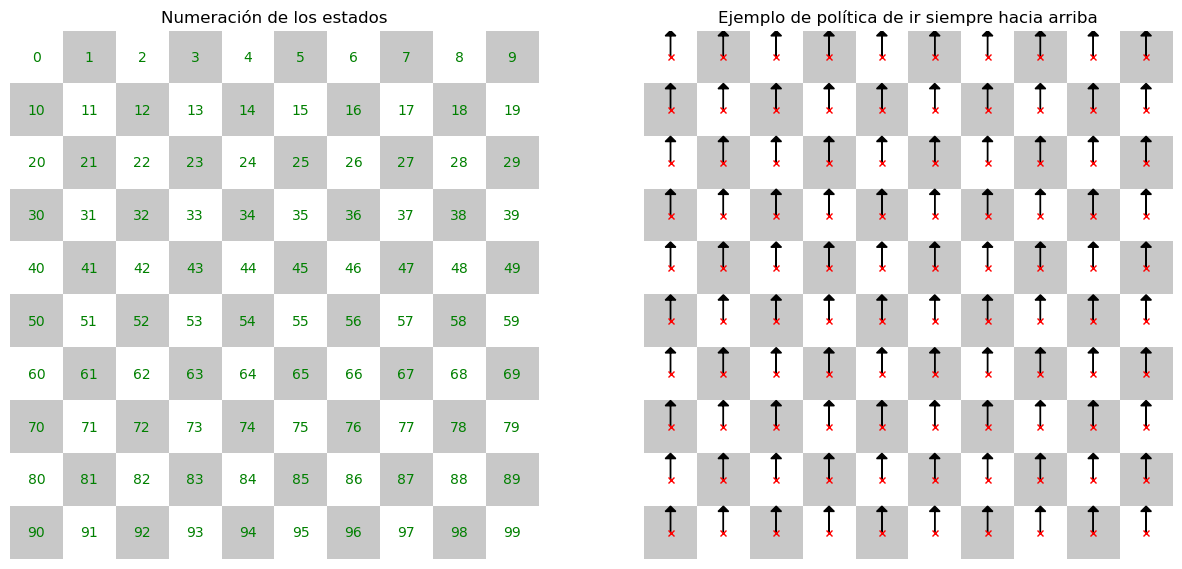

In [ ]:
from matplotlib.colors import LinearSegmentedColormap

def show_maze_values(states_vector:np.array, axs, colors = ['r','b','g'], colormap = None, hide_values = False):
    states_values = states_vector.reshape((10,10))

    # BACKGROUND
    if colormap is not None:
        background = np. zeros((10,10,3), dtype=np.uint8)
        cm = plt.get_cmap(colormap)
        normalized_color = (states_values-np.min(states_values))/(np.max(states_values)-np.min(states_values))
        for i in range(10):
            for j in range(10):
                background[i,j,:] = np.array(cm(normalized_color[i,j])[:3])*255
        axs.imshow(background)
        cm_values = LinearSegmentedColormap.from_list('custom_cmap', [(1,1,1), (0.5,0.5,0.5), (0,0,0), (0.5,0.5,0.5), (1,1,1)])

    else:        
        background = np.zeros((10,10,3), dtype=np.uint8)
        background[::2, ::2] = [255, 255, 255]
        background[1::2, 1::2] = [255, 255, 255]
        background[::2, 1::2] = [200, 200, 200]
        background[1::2, ::2] = [200, 200, 200]
        axs.imshow(background)


    # VALUES
    if not hide_values:
        for i in range(10):
            for j in range(10):
                if colormap is not None:
                    axs.text(j, i, str(round(states_values[i,j],2)), va='center', ha='center', color=cm_values(normalized_color[i,j])[:3])
                elif len(colors) == 3:
                    if states_values[i,j] < 0:
                        axs.text(j, i, str(round(states_values[i,j],2)), va='center', ha='center', color=colors[0])
                    elif states_values[i,j] == 0:
                        axs.text(j, i, str(round(states_values[i,j],2)), va='center', ha='center', color=colors[1])
                    else:
                        axs.text(j, i, str(round(states_values[i,j],2)), va='center', ha='center', color=colors[2])
    axs.axis('off')


def show_maze_actions(actions:np.array, axs, show_background = True):
    arrow_max_size = 0.4

    prob_actions_up = actions[:,0].reshape((10,10))
    prob_actions_down = actions[:,1].reshape((10,10))
    prob_actions_left = actions[:,2].reshape((10,10))
    prob_actions_right = actions[:,3].reshape((10,10))
    
    if show_background:
        background = np.zeros((10,10,3), dtype=np.uint8)
        background[::2, ::2] = [255, 255, 255]
        background[1::2, 1::2] = [255, 255, 255]
        background[::2, 1::2] = [200, 200, 200]
        background[1::2, ::2] = [200, 200, 200]
        axs.imshow(background)

    for i in range(10):
        for j in range(10):
            
            if prob_actions_up[i,j] > 0:
                axs.arrow(j, i, 0, -prob_actions_up[i,j] * arrow_max_size, head_width=0.2, head_length=0.1, fc='k', ec='k')
            if prob_actions_right[i,j] > 0:
                axs.arrow(j, i, prob_actions_right[i,j] * arrow_max_size, 0, head_width=0.2, head_length=0.1, fc='k', ec='k')
            if prob_actions_down[i,j] > 0:
                axs.arrow(j, i, 0, prob_actions_down[i,j] * arrow_max_size, head_width=0.2, head_length=0.1, fc='k', ec='k')
            if prob_actions_left[i,j] > 0:
                axs.arrow(j, i, -prob_actions_left[i,j] * arrow_max_size, 0, head_width=0.2, head_length=0.1, fc='k', ec='k')
            axs.plot(j,i,'rx', markersize=5)
    axs.axis('off')

test = np.arange(100)
fig, axs = plt.subplots(1,2, figsize=(15,10))
show_maze_values(test,axs[0], colors=['g','g','g'])
all_up_policy = np.zeros((n_states,n_actions))
all_up_policy[:,0] = 1
show_maze_actions(all_up_policy,axs[1])
axs[0].set_title('Numeración de los estados')
axs[1].set_title('Ejemplo de política de ir siempre hacia arriba');


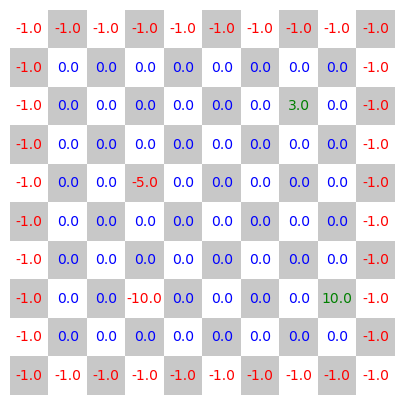

In [40]:
# See our reward function
fig, axs = plt.subplots(1,1, figsize=(5,5))
show_maze_values(R[[np.arange(100)],0,[[np.arange(100)]]],axs)

### 1.3. Resoltion of the MDP
Value Iteration / Policy Iteration.

##### 1.3.1. Algoritmo Lookahead
$$U^\pi_{k+1}(s) = R(s,\pi(s)) + \gamma \sum_{s'} T(s,\pi(s),s')  U^\pi_{k}(s')$$

$$U^\pi_{k+1}(s) =\sum_{s'}T(s,\pi(s),s')R(s,\pi(s),s') + \gamma \sum_{s'} T(s,\pi(s),s')  U^\pi_{k}(s')$$

$$U^\pi_{k+1}(s) = \sum_{s'}T(s,\pi(s),s')\left( R(s,\pi(s),s') + \gamma · U^\pi_{k}(s')\right)$$


In [41]:
def look_ahead(T, R, gamma, U, s, a):
    return  np.sum([T[s,a,sp]*(R[s,a,sp] + gamma*U[sp]) for sp in range(n_states)])

look_ahead(T, R, gamma, np.zeros(100), 0, 0)

-0.8

##### 1.3.2. Algoritmo Iterative Policy Evaluation

Iteraciones:  76


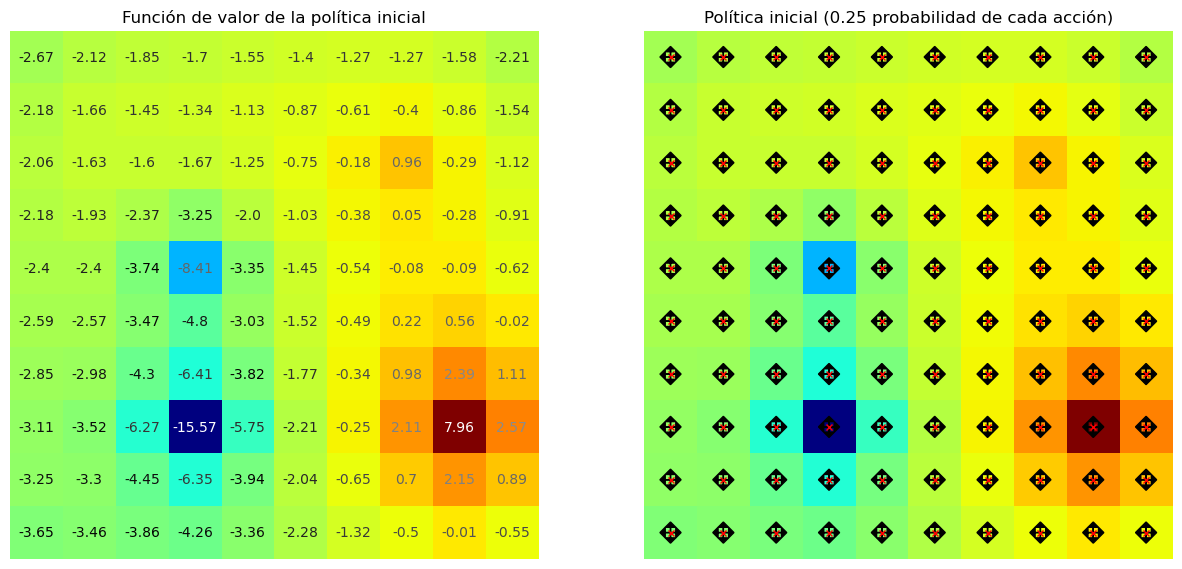

In [42]:
def iterative_policy_evaluation(T, R, gamma, P, k_max=100):
    U = np.zeros(100)
    U_old = np.zeros(100)
    
    for k in range(k_max):
        for s in range (n_states):
            U[s] = np.sum([P[s,a]*look_ahead(T, R, gamma, U, s, a) for a in range(n_actions)])

        if np.max(np.abs(U - U_old)) < 1e-6:
            print('Iteraciones: ', k)
            break

        U_old = U.copy()
    return U

P_inicial = np.ones((100,4)) * 0.25 
U_pi_iterative = iterative_policy_evaluation(T, R, gamma, P_inicial)

fig, axs = plt.subplots(1,2, figsize=(15,10))
show_maze_values(U_pi_iterative,axs[0], colormap='jet')
show_maze_values(U_pi_iterative,axs[1], colormap='jet', hide_values=True)
show_maze_actions(P_inicial,axs[1], show_background=False)
axs[0].set_title('Función de valor de la política inicial')
axs[1].set_title('Política inicial (0.25 probabilidad de cada acción)');


##### 1.3.3 Algoritmo Policy Iteration (exact)

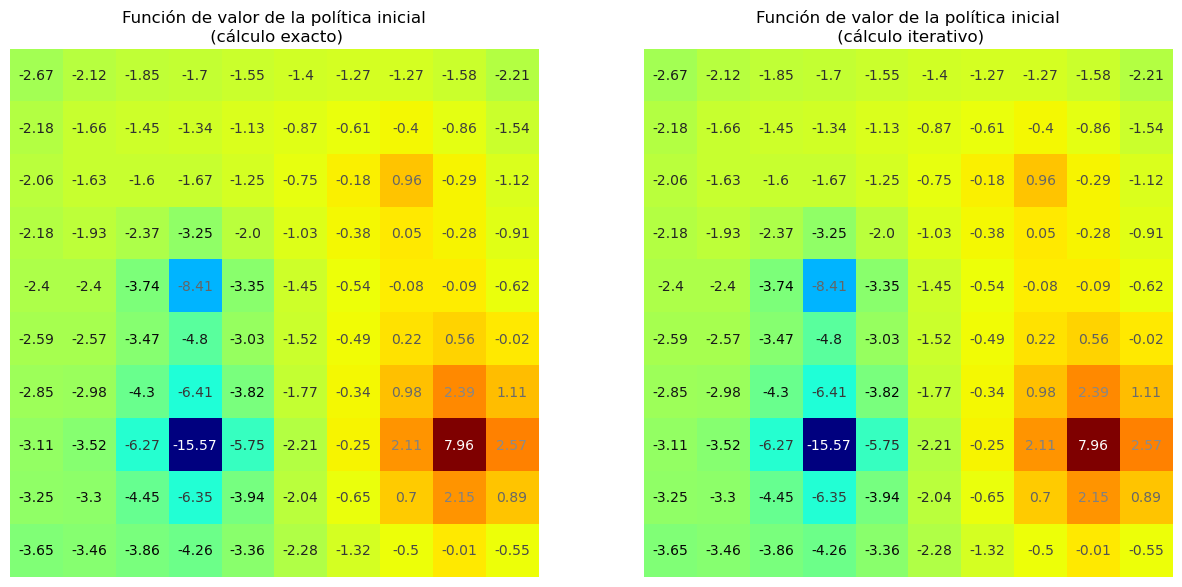

In [43]:
def exact_policy_evaluation(T, R, gamma, P):
    R_pi = np.zeros((n_states))
    for s in range(n_states):
        for sp in range(n_states):
            for a in range(n_actions):
                R_pi[s] += T[s,a,sp]*P[s,a]*R[s,a,sp]

    T_pi = np.zeros((n_states,n_states))
    for s in range(n_states):
        for sp in range(n_states):
            for a in range(n_actions):
                T_pi[s,sp] += T[s,a,sp]*P[s,a]

    return np.linalg.inv(np.eye(n_states) - gamma*T_pi) @ R_pi

U_pi_exact = exact_policy_evaluation(T, R, gamma, P_inicial)

fig, axs = plt.subplots(1,2, figsize=(15,10))
show_maze_values(U_pi_exact,axs[0], colormap='jet')
show_maze_values(U_pi_iterative,axs[1], colormap='jet')

axs[0].set_title('Función de valor de la política inicial\n (cálculo exacto)')
axs[1].set_title('Función de valor de la política inicial\n (cálculo iterativo)');

In [44]:
np.max(np.abs(U_pi_exact - U_pi_iterative))

4.7092034760609636e-06

##### 1.3.4 Algorimo Greedy

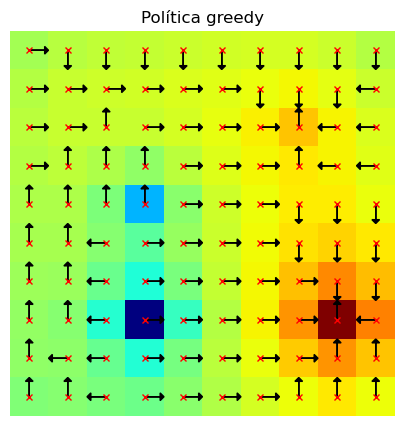

In [45]:
def greedy(T, R, gamma, U, s):
    return np.argmax([look_ahead(T, R, gamma, U, s, a) for a in range(n_actions)])

def greedy_policy(T, R, gamma, U):
    P = np.zeros((n_states,n_actions))
    for s in range(n_states):
        P[s, greedy(T, R, gamma, U, s)] = 1
    return P

P_greedy = greedy_policy(T, R, gamma, U_pi_exact)
fig, axs = plt.subplots(1,1, figsize=(5,5))
show_maze_values(U_pi_exact,axs, colormap='jet', hide_values=True)
show_maze_actions(P_greedy,axs, show_background=False)
axs.set_title('Política greedy');

##### 1.3.5 Algoritmo Policy Iteration

Iteraciones:  5


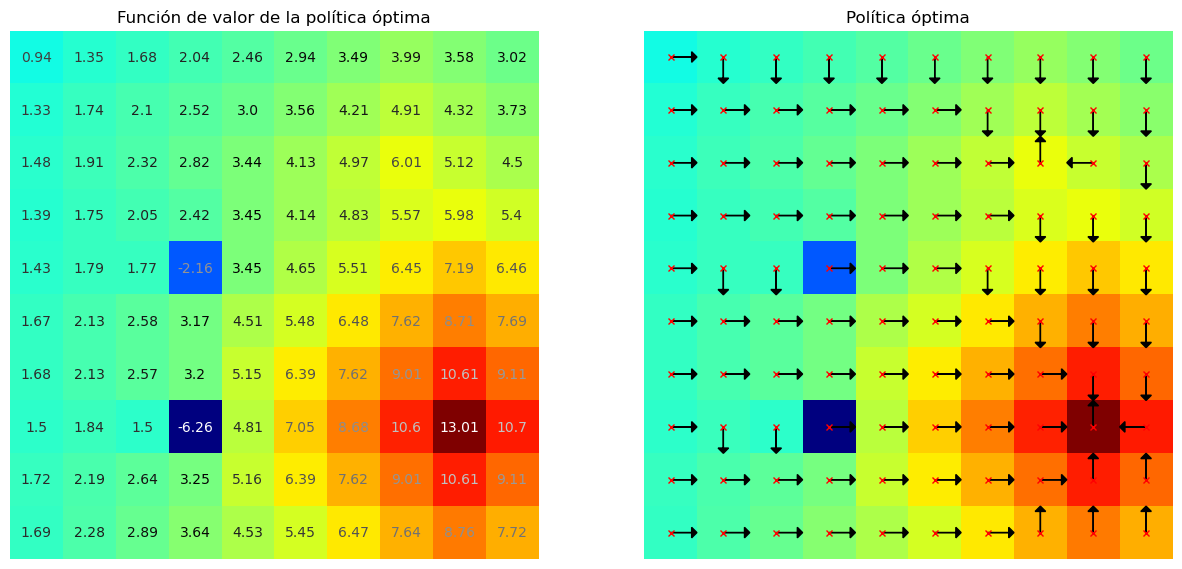

In [46]:
def policy_improvement(T, R, gamma, P):
    U = exact_policy_evaluation(T, R, gamma, P)
    P_new = greedy_policy(T, R, gamma, U)
    return P_new, U

def policy_iteration(T, R, gamma, P_initial, k_max=100):     
    P = P_initial.copy()
    for k in range(k_max):
        P_new, U = policy_improvement(T, R, gamma, P)
        if np.all(P_new == P):
            print('Iteraciones: ', k)
            break
        P = P_new
    return P, U

P_random = np.ones((n_states,n_actions)) * 0.25 # Política aleatoria
P_pi, U_pi = policy_iteration(T, R, gamma, P_random)

fig, axs = plt.subplots(1,2, figsize=(15,10))
show_maze_values(U_pi,axs[0], colormap='jet')
show_maze_values(U_pi,axs[1], colormap='jet', hide_values=True)
show_maze_actions(P_pi,axs[1], show_background=False)
axs[0].set_title('Función de valor de la política óptima')
axs[1].set_title('Política óptima');

##### 1.3.6 Algoritmo Value Iteration

Iteraciones:  125


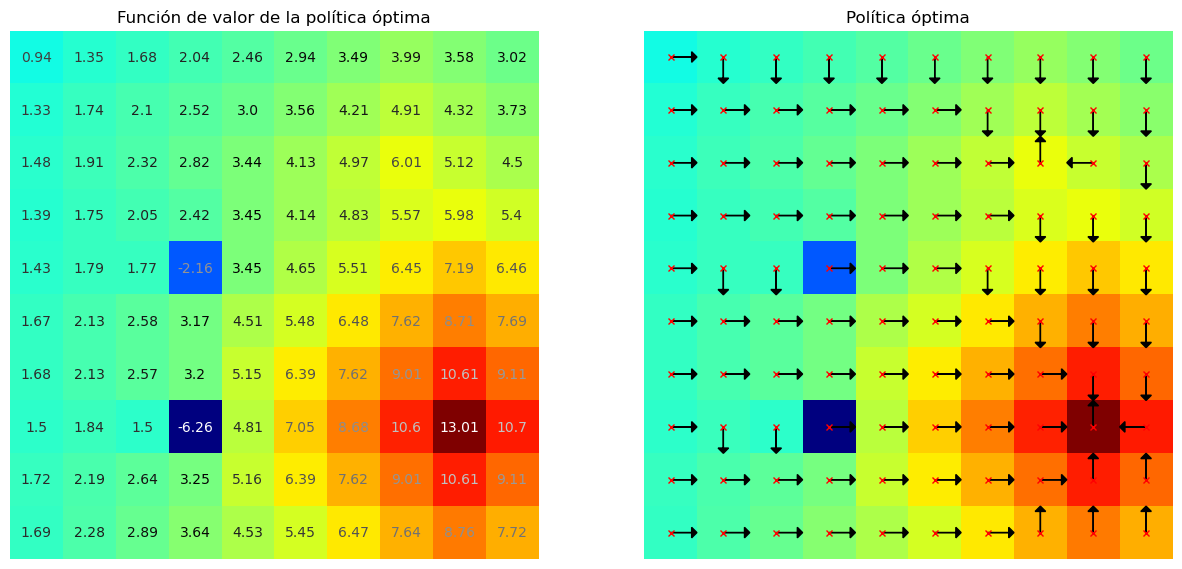

In [47]:
def backup(T, R, gamma, U, s):
    return np.max([look_ahead(T, R, gamma, U, s, a) for a in range(n_actions)])

def value_iteration(T, R, gamma, U_initial, k_max=150):
    U = U_initial.copy()
    for k in range(k_max):
        U_new = np.array([backup(T, R, gamma, U, s) for s in range(n_states)])
        if np.max(np.abs(U - U_new)) < 1e-6:
            print('Iteraciones: ', k)
            break
        U = U_new
    return U

U_initial = np.zeros(n_states)
U_vi = value_iteration(T, R, gamma, U_initial)
P_vi = greedy_policy(T, R, gamma, U_vi)

fig, axs = plt.subplots(1,2, figsize=(15,10))
show_maze_values(U_vi,axs[0], colormap='jet')
show_maze_values(U_vi,axs[1], colormap='jet', hide_values=True)
show_maze_actions(P_vi,axs[1], show_background=False)
axs[0].set_title('Función de valor de la política óptima')
axs[1].set_title('Política óptima');

In [48]:
print('Diferencia entre las funciones de valor:',np.max(np.abs(U_pi - U_vi)))
print('Diferencia entre las políticas óptimas:', np.max(np.abs(P_pi - P_vi)))

Diferencia entre las funciones de valor: 9.649947403822523e-06
Diferencia entre las políticas óptimas: 0.0


##### 1.3.7 Iteración asíncrona del valor

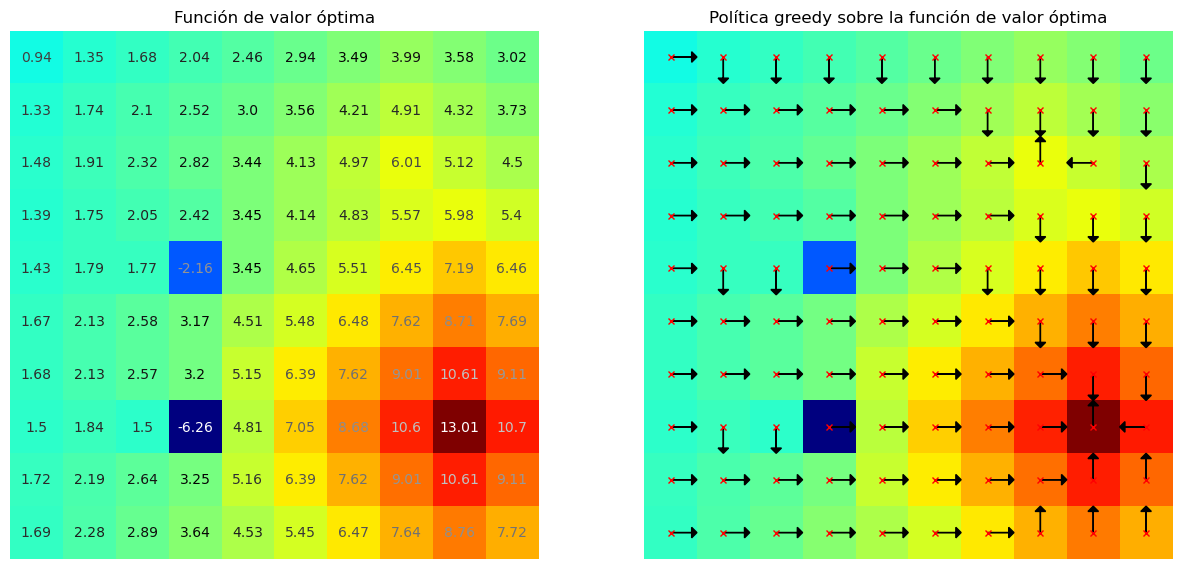

In [49]:
def async_iterative_value_iteration(T, R, gamma, U_initial, k_max=100):
    U = U_initial.copy()
    for k in range(k_max):
        for s in range(n_states):
            U[s] = backup(T, R, gamma, U, s)
    return U

U_initial = np.zeros(n_states)
U_async_vi = async_iterative_value_iteration(T, R, gamma, U_initial)
P_async_vi = greedy_policy(T, R, gamma, U_async_vi)

fig, axs = plt.subplots(1,2, figsize=(15,10))
show_maze_values(U_async_vi,axs[0], colormap='jet')
show_maze_values(U_async_vi,axs[1], colormap='jet', hide_values=True)
show_maze_actions(P_async_vi,axs[1], show_background=False)
axs[0].set_title('Función de valor óptima')
axs[1].set_title('Política greedy sobre la función de valor óptima');


In [50]:
print('Diferencia entre las funciones de valor:',np.max(np.abs(U_pi-U_async_vi)))
print('Diferencia entre las políticas óptimas:', np.max(np.abs(P_pi-P_async_vi)))

Diferencia entre las funciones de valor: 2.2590845414338645e-06
Diferencia entre las políticas óptimas: 0.0


Diferencia entre las funciones de valor: 0.8130099017948879
Diferencia entre las políticas óptimas: 0.0


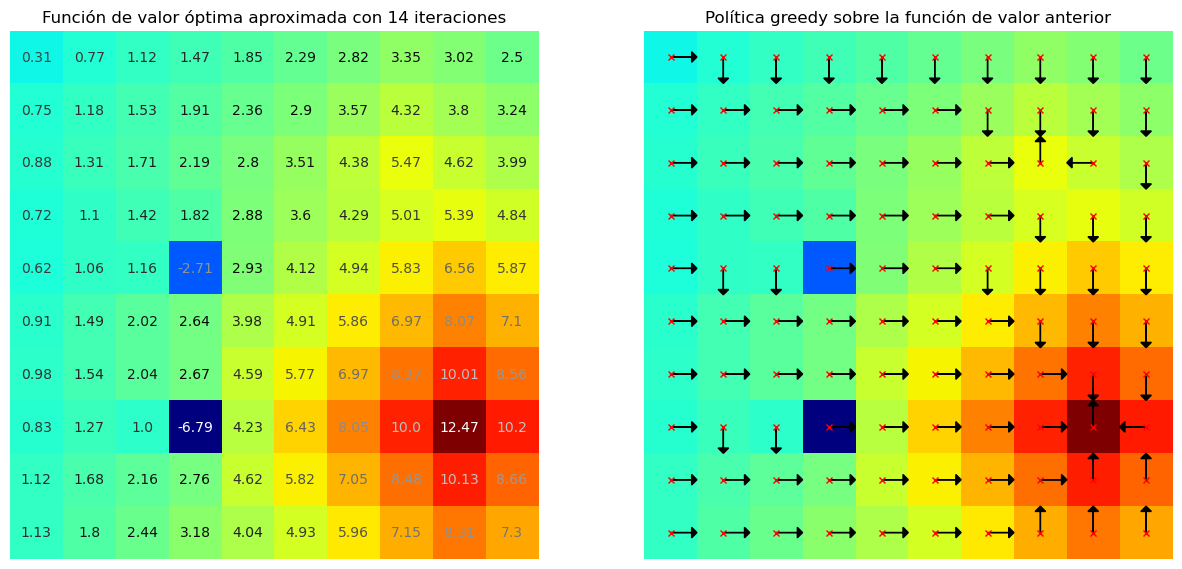

In [51]:

U_initial = np.zeros(n_states)
U_async_vi_10 = async_iterative_value_iteration(T, R, gamma, U_initial, k_max=14)
P_async_vi_10 = greedy_policy(T, R, gamma, U_async_vi_10)
print('Diferencia entre las funciones de valor:',np.max(np.abs(U_pi-U_async_vi_10)))
print('Diferencia entre las políticas óptimas:', np.max(np.abs(P_pi-P_async_vi_10)))

fig, axs = plt.subplots(1,2, figsize=(15,10))
show_maze_values(U_async_vi_10,axs[0], colormap='jet')
show_maze_values(U_async_vi_10,axs[1], colormap='jet', hide_values=True)
show_maze_actions(P_async_vi_10,axs[1], show_background=False)
axs[0].set_title('Función de valor óptima aproximada con 14 iteraciones')
axs[1].set_title('Política greedy sobre la función de valor anterior');